In [1]:
!pip install pygmo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 4.6 MB/s 


In [2]:
import math
import pygmo as pg
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import rc
from matplotlib import colors as cm

In [4]:
#Optimize function
def RastriginFunction(*X, A = 10):
    return A + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])

In [5]:
#Points function graph
xDraw = np.linspace(-5.12, 5.12, num=200)
yDraw = np.linspace(-5.12, 5.12, num=200)
X, Y = np.meshgrid(xDraw, yDraw) 
Z = RastriginFunction(X, Y)

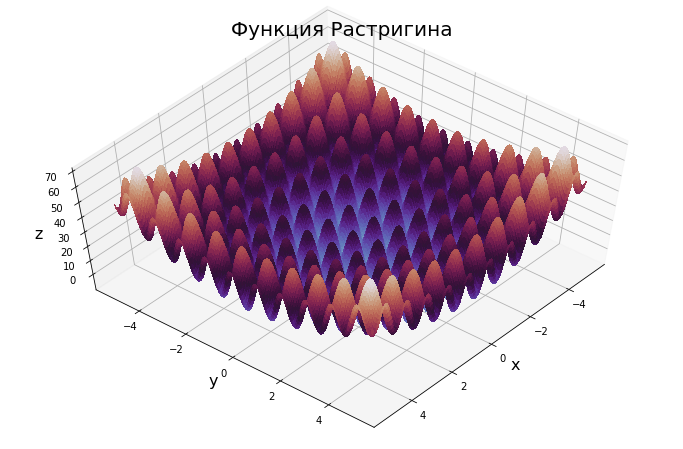

In [6]:
#Function graph
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='twilight', linewidth=1, antialiased=False)
ax.view_init(60, 40)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
ax.set_title('Функция Растригина', fontsize=20)
plt.show()

In [8]:
#PyGMO
class Rastrigin():
  @staticmethod
  def fitness(x):
    return [RastriginFunction(x[0], x[1])]

  @staticmethod
  def get_bounds():
    return ([-5.12, -5.12], [5.12, 5.12])

  @staticmethod
  def gradient(self, x):
        return pg.estimate_gradient_h(lambda x: self.fitness(x), x)

algo = pg.algorithm(pg.sga(gen=100))
prob = pg.problem(Rastrigin())
pop = pg.population(prob, 100)
pop = algo.evolve(pop)
print(pop.champion_f)

[-9.9392352]


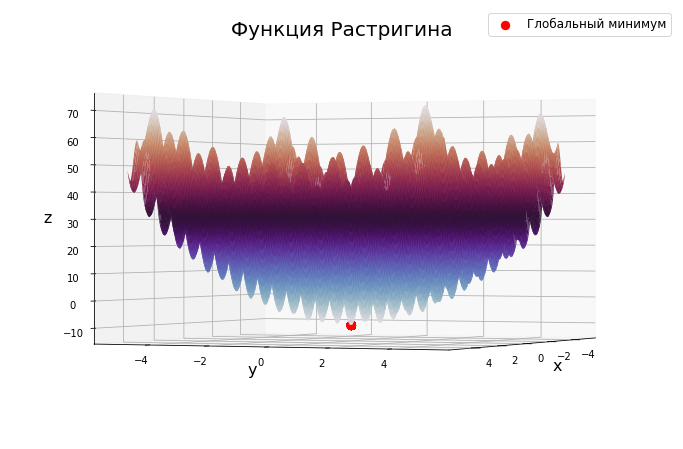

In [9]:
#Global minimum graph
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='twilight', linewidth=1, antialiased=True)
ax.view_init(0, 25)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
ax.set_title('Функция Растригина', fontsize=20)
x = pop.get_x()[:,0]
y = pop.get_x()[:,0]
z = pop.get_f()[:,0]
ax.scatter3D(x, y, z, s=70, c='r', label ='Глобальный минимум')
ax.legend(fontsize=12)
plt.show()

In [102]:
#Animation of global minimum search
prob = pg.problem(Rastrigin())
algo = pg.algorithm(pg.sade(gen=3))
pop=None

fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d', autoscale_on=False, xlim=(-5.12,5.12), ylim=(-5.12,5.12), zlim=(-10, 60))

ax.plot_wireframe(X, Y, Z)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
ax.set_title('Функция Растригина', fontsize=20, fontweight=10, loc='left')

points, = ax.plot([], [], [], linestyle='None', marker='o', markersize=10, c='red', markeredgecolor='black', label='Глобальный минимум')
ax.legend(fontsize=12)
text_template = "Поколение #%s"
text = ax.text(0, 0, 0, '', fontsize=16, transform=ax.transAxes)

def init_func():
  points.set_data_3d([], [], [])
  text.set_text(text_template % 0)
  return points, text

def animate(i):
  global pop
  if i==1:
    pop = pg.population(prob, size=100)
  else:
    pop = algo.evolve(pop)

  x = pop.get_x()[:,0]
  y = pop.get_x()[:,0]
  z = pop.get_f()[:,0]
  points.set_data_3d(x, y, z)
  text.set_text(text_template % i)
  return points, text

get_animation = animation.FuncAnimation(fig, animate, np.arange(1,20), init_func=init_func, interval=300, blit=False, repeat_delay=1000)
plt.close()
rc('animation', html='html5')
get_animation